In [2]:
import numpy as np
import pandas as pd
import os

# Set the directory path
directory_path = r'C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts'

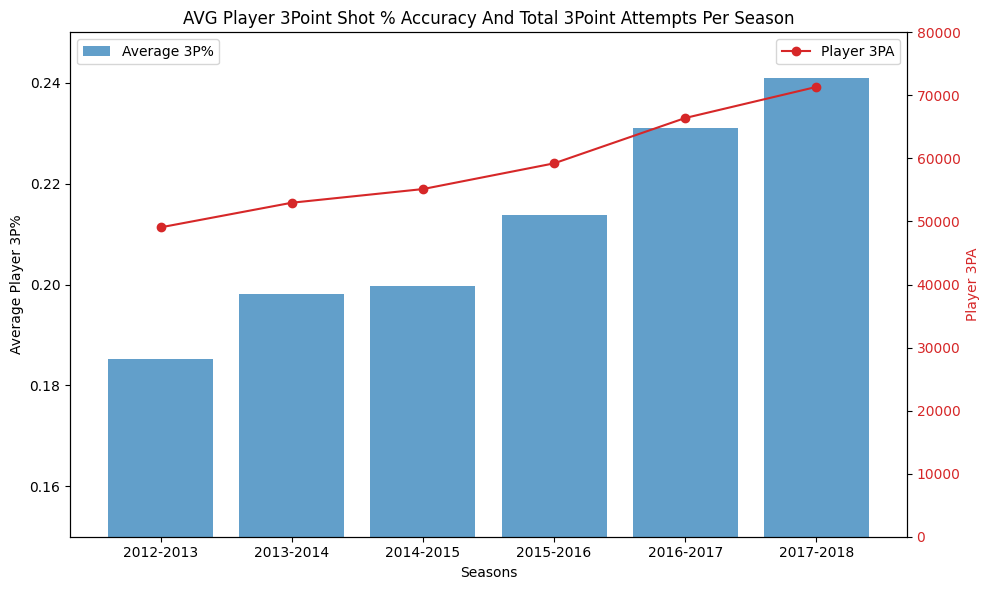

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data_player = pd.read_csv(r"C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_playerBoxScore.csv")

# Convert 'gmDate' to datetime
data_player['gmDate'] = pd.to_datetime(data_player['gmDate'])

# Define the season bins using a case statement
data_player['Season'] = pd.cut(data_player['gmDate'],
                        bins=[
                            pd.to_datetime('2012-10-01'),
                            pd.to_datetime('2013-08-01'),
                            pd.to_datetime('2014-08-01'),
                            pd.to_datetime('2015-08-01'),
                            pd.to_datetime('2016-08-01'),
                            pd.to_datetime('2017-08-01'),
                            pd.to_datetime('2018-08-01')
                        ],
                        labels=[
                            '2012-2013',
                            '2013-2014',
                            '2014-2015',
                            '2015-2016',
                            '2016-2017',
                            '2017-2018'
                        ],
                        right=False)

# Calculate average player 3P% and player 3PA per season
season_stats = data_player.groupby('Season').agg({
    'play3P%': 'mean',  # Average player 3P%
    'play3PA': 'sum'    # Total player 3PA
}).reset_index()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average player 3P%
ax1.bar(season_stats['Season'], season_stats['play3P%'], color='tab:blue', alpha=0.7, label='Average 3P%')
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Average Player 3P%')
ax1.set_ylim(0.15, 0.25)  # Set the y-axis limit to a range of 0.15 to 0.25
ax1.legend(loc='upper left')

# Creating a second y-axis for the player 3PA
ax2 = ax1.twinx()
ax2.plot(season_stats['Season'], season_stats['play3PA'], color='tab:red', marker='o', label='Player 3PA')
ax2.set_ylabel('Player 3PA', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 80000)  # Set the y-axis limit to a range of 0 to 80,000
ax2.legend(loc='upper right')

# Set the title
plt.title('AVG Player 3Point Shot % Accuracy And Total 3Point Attempts Per Season')

# Show the plot
plt.tight_layout()
plt.show()

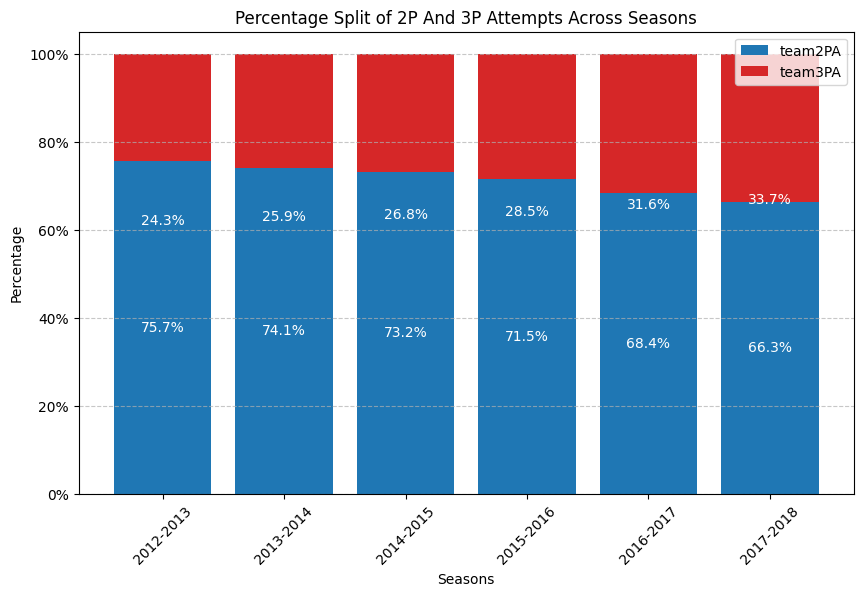

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data_team = pd.read_csv(r"C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_teamBoxScore.csv")

# Convert 'gmDate' to datetime
data_team['gmDate'] = pd.to_datetime(data_team['gmDate'])

# Define the season bins using a case statement
data_team['Season'] = pd.Series(
    np.select(
        [
            (data_team['gmDate'] >= '2012-10-01') & (data_team['gmDate'] < '2013-08-01'),
            (data_team['gmDate'] >= '2013-10-01') & (data_team['gmDate'] < '2014-08-01'),
            (data_team['gmDate'] >= '2014-10-01') & (data_team['gmDate'] < '2015-08-01'),
            (data_team['gmDate'] >= '2015-10-01') & (data_team['gmDate'] < '2016-08-01'),
            (data_team['gmDate'] >= '2016-10-01') & (data_team['gmDate'] < '2017-08-01'),
            (data_team['gmDate'] >= '2017-10-01') & (data_team['gmDate'] < '2018-08-01')
        ],
        [
            '2012-2013',
            '2013-2014',
            '2014-2015',
            '2015-2016',
            '2016-2017',
            '2017-2018'
        ],
        default=None
    )
)

# Calculate the total team2PA and team3PA for each season
season_totals = data_team.groupby('Season')[['team2PA', 'team3PA']].sum()

# Calculate the percentage split of team2PA and team3PA across seasons
season_perc = season_totals.div(season_totals.sum(axis=1), axis=0) * 100

# Plotting the data as a 100% stacked bar chart
plt.figure(figsize=(10, 6))
p1 = plt.bar(season_perc.index, season_perc['team2PA'], color='tab:blue', label='team2PA')
p2 = plt.bar(season_perc.index, season_perc['team3PA'], bottom=season_perc['team2PA'], color='tab:red', label='team3PA')
plt.xlabel('Seasons')
plt.ylabel('Percentage')
plt.title('Percentage Split of 2P And 3P Attempts Across Seasons')
plt.legend((p1[0], p2[0]), ('team2PA', 'team3PA'))

# Add labels for each bar indicating the percentage split
for index, value in enumerate(season_perc['team2PA']):
    plt.text(index, value/2, f'{value:.1f}%', ha='center', va='center', color='white')

for index, value in enumerate(season_perc['team3PA']):
    plt.text(index, value + season_perc['team2PA'][index]/2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

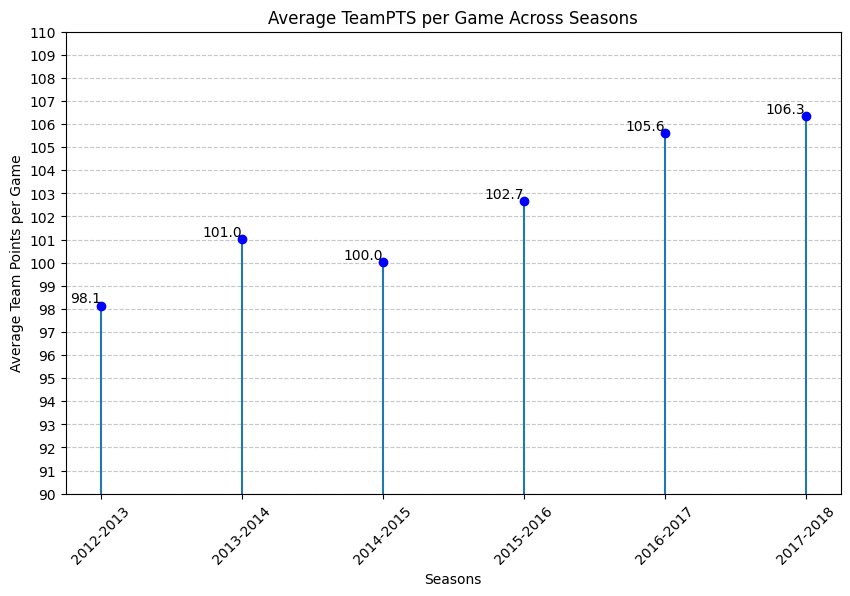

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_teamBoxScore.csv")

# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

# Define the season bins using a case statement
data['Season'] = pd.Series(
    np.select(
        [
            (data['gmDate'] >= '2012-10-01') & (data['gmDate'] < '2013-08-01'),
            (data['gmDate'] >= '2013-10-01') & (data['gmDate'] < '2014-08-01'),
            (data['gmDate'] >= '2014-10-01') & (data['gmDate'] < '2015-08-01'),
            (data['gmDate'] >= '2015-10-01') & (data['gmDate'] < '2016-08-01'),
            (data['gmDate'] >= '2016-10-01') & (data['gmDate'] < '2017-08-01'),
            (data['gmDate'] >= '2017-10-01') & (data['gmDate'] < '2018-08-01')
        ],
        [
            '2012-2013',
            '2013-2014',
            '2014-2015',
            '2015-2016',
            '2016-2017',
            '2017-2018'
        ],
        default=None
    )
)

# Calculate average teamPTS per game for each season
season_stats = data.groupby('Season')['teamPTS'].mean().reset_index()

# Sort the DataFrame by season in ascending order
season_stats = season_stats.sort_values(by='Season', ascending=True)

# Plotting the data as a lollipop chart
plt.figure(figsize=(10, 6))
plt.stem(season_stats['Season'], season_stats['teamPTS'], linefmt='tab:blue', markerfmt='bo', basefmt=' ')

# Add labels for each data point
for index, value in enumerate(season_stats['teamPTS']):
    plt.text(season_stats['Season'][index], value, f'{value:.1f}', ha='right', va='bottom')

plt.xlabel('Seasons')
plt.ylabel('Average Team Points per Game')
plt.title('Average TeamPTS per Game Across Seasons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set the y-axis limits and ticks
plt.ylim(90, 110)
plt.yticks(np.arange(90, 111, 1))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

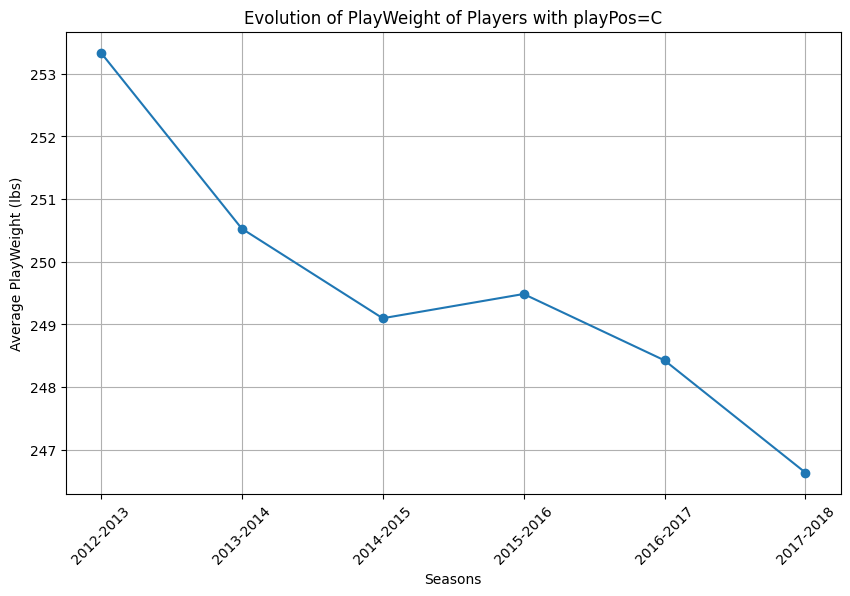

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_playerBoxScore.csv")

# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

# Define the season bins using a case statement
data['Season'] = pd.cut(data['gmDate'],
                        bins=[
                            pd.to_datetime('2012-10-01'),
                            pd.to_datetime('2013-08-01'),
                            pd.to_datetime('2014-08-01'),
                            pd.to_datetime('2015-08-01'),
                            pd.to_datetime('2016-08-01'),
                            pd.to_datetime('2017-08-01'),
                            pd.to_datetime('2018-08-01')
                        ],
                        labels=[
                            '2012-2013',
                            '2013-2014',
                            '2014-2015',
                            '2015-2016',
                            '2016-2017',
                            '2017-2018'
                        ],
                        right=False)

# Filter data for players with "playPos" = C
center_data = data[data['playPos'] == 'C']

# Group by Season and calculate the mean playWeight for each season
center_weight_stats = center_data.groupby('Season')['playWeight'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(center_weight_stats['Season'], center_weight_stats['playWeight'], marker='o', color='tab:blue')
plt.xlabel('Seasons')
plt.ylabel('Average PlayWeight (lbs)')
plt.title('Evolution of PlayWeight of Players with playPos=C')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

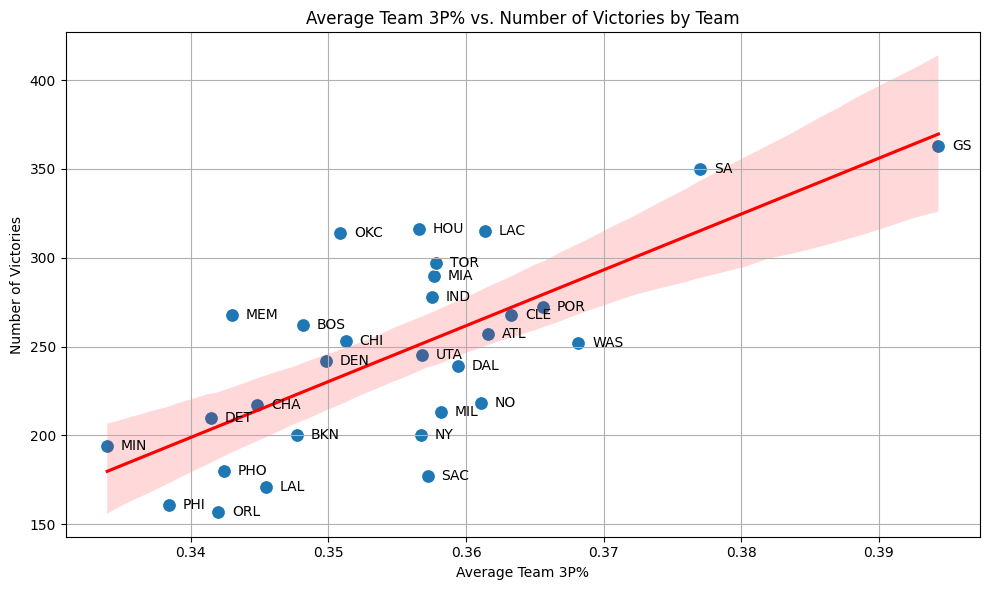

In [20]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the warning
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")

# Read the CSV file
file_path = r'C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_teamBoxScore.csv'
df = pd.read_csv(file_path)

# Calculate the average team 3P% and the number of victories by teamAbbr
avg_team3P = df.groupby('teamAbbr')['team3P%'].mean()
num_victories = df[df['teamRslt'] == 'Win'].groupby('teamAbbr').size()

# Create a new DataFrame with the calculated values
data = pd.DataFrame({'Average Team 3P%': avg_team3P, 'Number of Victories': num_victories})

# Create the scatterplot with labels
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Average Team 3P%', y='Number of Victories', data=data, s=100)

# Add text labels to the points
for team, row in data.iterrows():
    ax.text(row['Average Team 3P%'] + 0.001, row['Number of Victories'], team, ha='left', va='center')

# Add labels and title
plt.xlabel('Average Team 3P%')
plt.ylabel('Number of Victories')
plt.title('Average Team 3P% vs. Number of Victories by Team')

# Add a trend line
sns.regplot(x='Average Team 3P%', y='Number of Victories', data=data, scatter=False, color='red')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

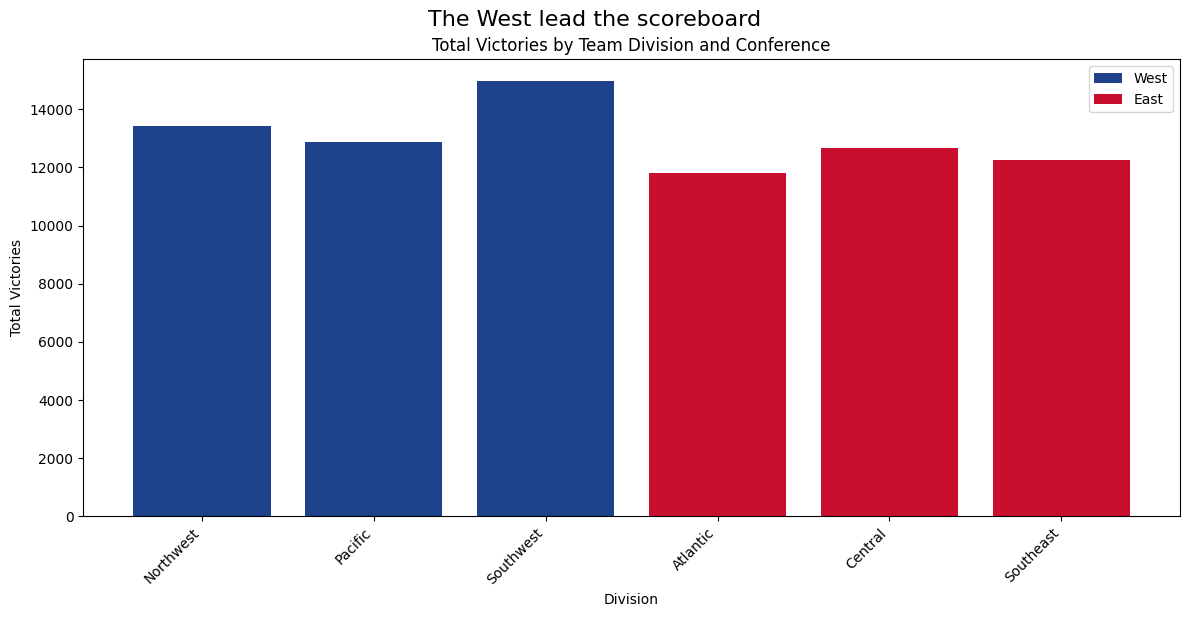

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = r"C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_playerBoxScore.csv"
df = pd.read_csv(file_path)

# Let's calculate the sum of victories for each team division and conference
team_div_victories = df.groupby(['teamConf', 'teamDiv'])['teamRslt'].apply(lambda x: (x == 'Win').sum()).reset_index()
team_div_victories.rename(columns={'teamRslt': 'Victories'}, inplace=True)

# Create the column chart with different colors for West and East conferences
plt.figure(figsize=(12, 6))
west_mask = team_div_victories['teamConf'] == 'West'
east_mask = team_div_victories['teamConf'] == 'East'

# Color codes for blue and red
blue_color = '#1d428a'
red_color = '#c8102e'

plt.bar(team_div_victories[west_mask]['teamDiv'], team_div_victories[west_mask]['Victories'], color=blue_color, label='West')
plt.bar(team_div_victories[east_mask]['teamDiv'], team_div_victories[east_mask]['Victories'], color=red_color, label='East')

plt.xlabel('Division')
plt.ylabel('Total Victories')
plt.title('Total Victories by Team Division and Conference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Add the graph title above the plot
plt.suptitle("The West lead the scoreboard", fontsize=16, y=1.02)

plt.show()

In [23]:
import pandas as pd
import folium

# Read the CSV file into a pandas DataFrame
data_file = r'C:\Users\j\Desktop\PORTFOLIO\3. The Rise of the 3Point Shot\3Point_Scripts\2012-18_teamBoxScore.csv'
df = pd.read_csv(data_file)

# Extract the team and victories data from the DataFrame
team_victories = df.groupby('teamAbbr')['teamRslt'].apply(lambda x: (x == 'Win').sum()).to_dict()

# Team coordinates
coordinates = {
    'BOS': (42.366389, -71.062222),
    'BKN': (40.682778, -73.974722),
    'NY': (40.750556, -73.993611),
    'PHI': (39.901111, -75.171944),
    'TOR': (43.643333, -79.379167),
    'CHI': (41.880556, -87.674722),
    'CLE': (41.496389, -81.688056),
    'DET': (42.341111, -83.055000),
    'IND': (39.763889, -86.322222),
    'MIL': (43.043611, -87.916944),
    'ATL': (33.757222, -84.396389),
    'CHA': (35.225000, -80.843056),
    'MIA': (25.781389, -80.187222),
    'ORL': (28.539167, -81.383611),
    'WAS': (38.898889, -77.020833),
    'DEN': (39.748611, -105.007500),
    'MIN': (44.979444, -93.276111),
    'OKC': (35.463056, -97.515000),
    'POR': (45.531667, -122.666944),
    'UTA': (40.768333, -111.901111),
    'GS': (37.768056, -122.387500),
    'LAC': (33.945000, -118.408056),
    'LAL': (34.043056, -118.267500),
    'PHO': (33.445833, -112.071389),
    'SAC': (38.649167, -121.518056),
    'DAL': (32.790833, -96.810278),
    'HOU': (29.750833, -95.362500),
    'MEM': (35.138889, -90.051111),
    'NO': (29.948889, -90.081944),
    'SA': (29.427222, -98.437500),
}

# Create the map centered around the USA
map_center = [39.8283, -98.5795]
map_zoom = 4
map_obj = folium.Map(location=map_center, zoom_start=map_zoom, max_bounds=True, dragging=False, scrollWheelZoom=False)

# Define a color gradient for the bubble map
color_scale = folium.LinearColormap(colors=['yellow', 'orange', 'red'], vmin=min(team_victories.values()), vmax=max(team_victories.values()))

# Add circle markers for each team with the number of victories as the popup, smaller size, and color
for team, coord in coordinates.items():
    victories = team_victories.get(team, 0)
    popup_text = f"{team}: {victories} victories"
    folium.CircleMarker(location=coord, radius=victories/6, popup=popup_text, color=color_scale(victories), fill=True, fill_color=color_scale(victories)).add_to(map_obj)

# Add color scale to the map
color_scale.caption = 'Number of Wins'
color_scale.add_to(map_obj)

# Display the map in the Kaggle notebook
map_obj